In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import math
import numpy as np
%matplotlib inline

In [2]:
# data_path = r'C:\Users\johnn\Downloads\nba_odds_raw.csv'
data_path = r'C:\Users\johnny.wong\PycharmProjects\NBA pricing\Data\nba_odds_raw.csv'
raw_odds = pd.read_csv(data_path)
raw_odds.head()

,YY,DD,MM,Seasons,Home team,Away team,Home ID,Away ID,End of regulation score,Home final score,Away final score,Winning team,Total score,Home odds 1,Away odds 1,Home odds 2,Away odds 2,Home odds 3,Away odds 3
0,2019,11,Feb,2018/2019,Golden State Warriors,Miami Heat,GSW,MIA,NaN,120.0,118.0,H,238.0,1.08,10.40,1.08,10.16,1.07,9.50
1,2019,11,Feb,2018/2019,Atlanta Hawks,Orlando Magic,ATL,ORL,NaN,108.0,124.0,A,232.0,2.06,1.62,2.04,1.87,2.20,1.71
2,2019,10,Feb,2018/2019,Sacramento Kings,Phoenix Suns,SAC,PHX,NaN,117.0,104.0,H,221.0,1.19,3.90,1.24,4.65,1.26,4.00
3,2019,10,Feb,2018/2019,Philadelphia 76ers,Los Angeles Lakers,PHI,LAL,NaN,143.0,120.0,H,263.0,1.33,3.00,1.34,3.56,1.34,3.35
4,2019,10,Feb,2018/2019,Dallas Mavericks,Portland Trail Blazers,DAL,POR,NaN,102.0,101.0,H,203.0,2.61,1.57,2.62,1.56,1.74,2.15


In [3]:
raw_odds['date_string'] = raw_odds.apply(lambda row:str(row.DD)+'-'+str(row.MM)+'-'+str(row.YY), axis=1)
raw_odds['Date'] = raw_odds.date_string.apply(lambda date_str: dt.datetime.strptime(date_str, '%d-%b-%Y'))

# Remove bad data
raw_odds = raw_odds[raw_odds['Total score'] > 50]

# Used for later since there seems to be positive skew
raw_odds['log Total score'] = raw_odds['Total score'].apply(math.log)
raw_odds.head()

,YY,DD,MM,Seasons,Home team,Away team,Home ID,Away ID,End of regulation score,Home final score,...,Total score,Home odds 1,Away odds 1,Home odds 2,Away odds 2,Home odds 3,Away odds 3,date_string,Date,log Total score
0,2019,11,Feb,2018/2019,Golden State Warriors,Miami Heat,GSW,MIA,NaN,120.0,...,238.0,1.08,10.40,1.08,10.16,1.07,9.50,11-Feb-2019,2019-02-11,5.472271
1,2019,11,Feb,2018/2019,Atlanta Hawks,Orlando Magic,ATL,ORL,NaN,108.0,...,232.0,2.06,1.62,2.04,1.87,2.20,1.71,11-Feb-2019,2019-02-11,5.446737
2,2019,10,Feb,2018/2019,Sacramento Kings,Phoenix Suns,SAC,PHX,NaN,117.0,...,221.0,1.19,3.90,1.24,4.65,1.26,4.00,10-Feb-2019,2019-02-10,5.398163
3,2019,10,Feb,2018/2019,Philadelphia 76ers,Los Angeles Lakers,PHI,LAL,NaN,143.0,...,263.0,1.33,3.00,1.34,3.56,1.34,3.35,10-Feb-2019,2019-02-10,5.572154
4,2019,10,Feb,2018/2019,Dallas Mavericks,Portland Trail Blazers,DAL,POR,NaN,102.0,...,203.0,2.61,1.57,2.62,1.56,1.74,2.15,10-Feb-2019,2019-02-10,5.313206


Text(0, 0.5, 'Total points')

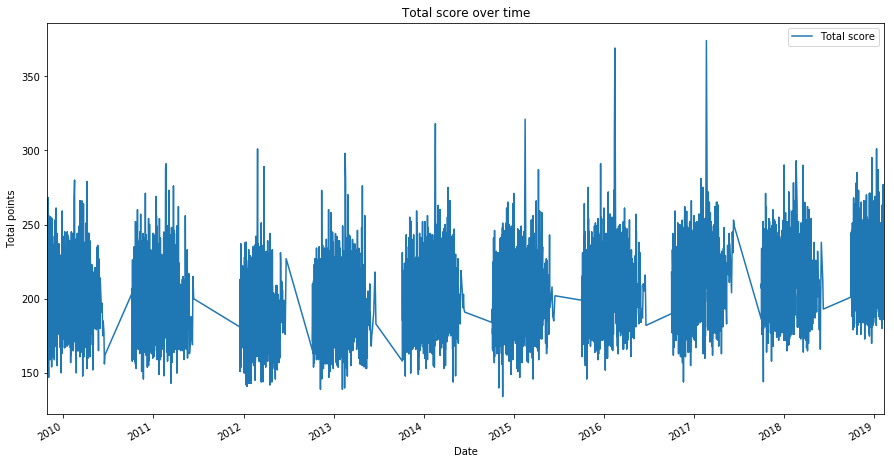

In [4]:
raw_odds.plot(y='Total score', x='Date', figsize=[15, 8],
             title='Total score over time')
plt.ylabel('Total points')

Seems like total points increased this season. Maybe there's been a rule change? In any case, this season's games is probably most relevant.

In [5]:
df_this_season = raw_odds[raw_odds.Seasons == '2018/2019']

In [6]:
def filter_by_team(df, team):
    df_team = df[(df['Home ID'] == team)|(df['Away ID'] == team)]
    return df_team

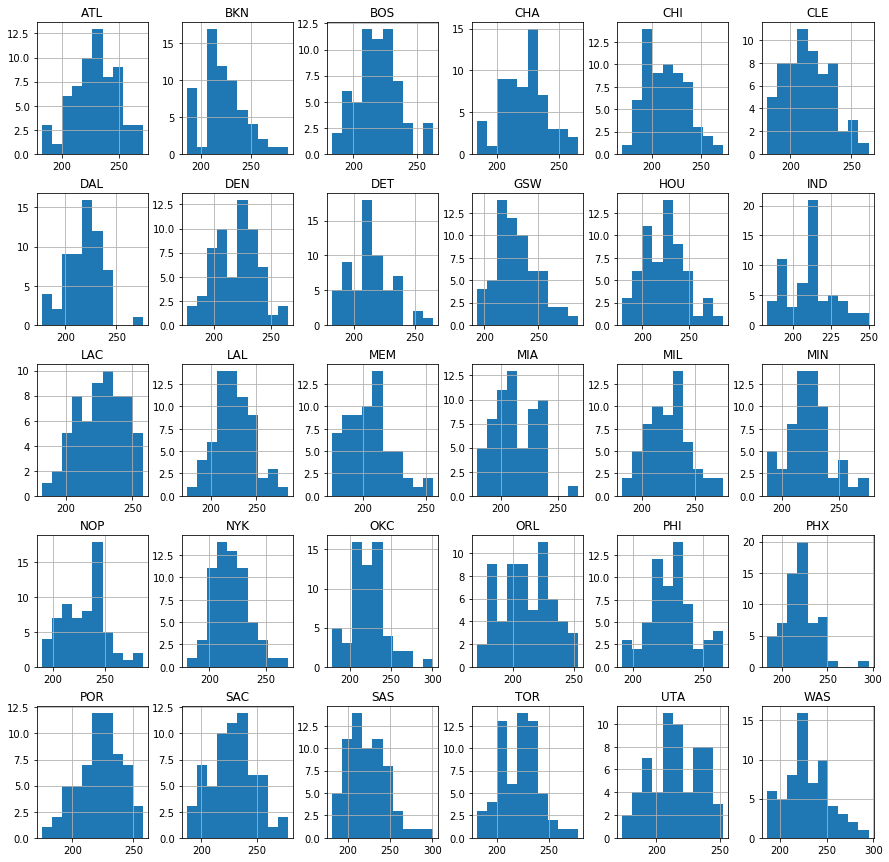

In [7]:
team_list = ["ATL","BKN","BOS","CHA","CHI","CLE","DAL","DEN","DET","GSW","HOU","IND",
             "LAC","LAL","MEM","MIA","MIL","MIN","NOP","NYK","OKC","ORL","PHI","PHX",
             "POR","SAC","SAS","TOR","UTA","WAS"]

fig = plt.figure(figsize=[15, 15])

for i, team in enumerate(team_list):
    ax = fig.add_subplot(5, 6, i+1)
    df_team = filter_by_team(df_this_season, team)
    df_team.hist(column='Total score', ax=ax)
    ax.set_title(team)

Not extremely consistent over 1 season, maybe we can have a look at more data to remove the variance?

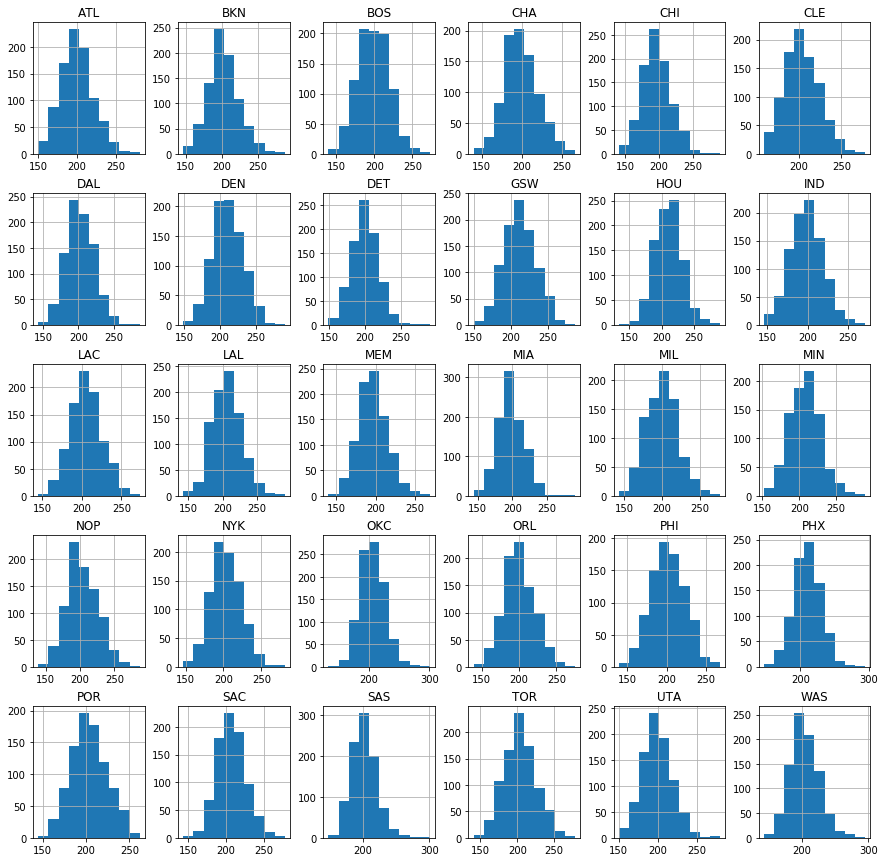

In [8]:
team_list = ["ATL","BKN","BOS","CHA","CHI","CLE","DAL","DEN","DET","GSW","HOU","IND",
             "LAC","LAL","MEM","MIA","MIL","MIN","NOP","NYK","OKC","ORL","PHI","PHX",
             "POR","SAC","SAS","TOR","UTA","WAS"]

fig = plt.figure(figsize=[15, 15])

for i, team in enumerate(team_list):
    ax = fig.add_subplot(5, 6, i+1)
    df_team = filter_by_team(raw_odds, team)
    df_team.hist(column='Total score', ax=ax)
    ax.set_title(team)

Seems like there might be a slight positive skew. This makes sense because games can go into overtime. However it's important to be wary that average total points have been changing season by season. Might be worth doing an analysis on how skew changes for each team season by season

In [9]:
df_skew = pd.DataFrame()

for team in team_list:
    df_team = filter_by_team(raw_odds, team)
    df_team = df_team[['Seasons', 'Total score']]

    team_skew = df_team.groupby('Seasons').skew()
    team_skew.columns = [team + ' skew']

    if len(df_skew) == 0:
        df_skew = team_skew.copy()
    else:
        df_skew = df_skew.merge(team_skew, left_index=True, right_index=True)

Text(0, 0.5, 'Skew')

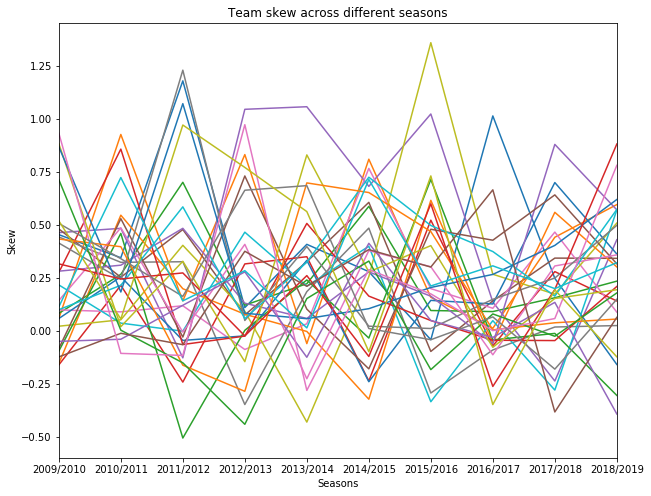

In [10]:
df_skew.plot(legend=False, figsize=[10, 8])
plt.title('Team skew across different seasons')
plt.ylabel('Skew')

Seems like there is a bias towards having positive skew across multiple seasons. I'm happy ot assume that the distribution is positively skewed. I wonder how well this data would fit a lognormal distribution? Try logging the data and see if it looks Gaussian.

In [11]:
df_logged_skew = pd.DataFrame()

for team in team_list:
    df_team = filter_by_team(raw_odds, team)
    df_team = df_team[['Seasons', 'log Total score']]

    team_skew = df_team.groupby('Seasons').skew()
    team_skew.columns = [team + ' skew']

    if len(df_logged_skew) == 0:
        df_logged_skew = team_skew.copy()
    else:
        df_logged_skew = df_logged_skew.merge(team_skew, left_index=True, right_index=True)

Text(0, 0.5, 'Skew of log scores')

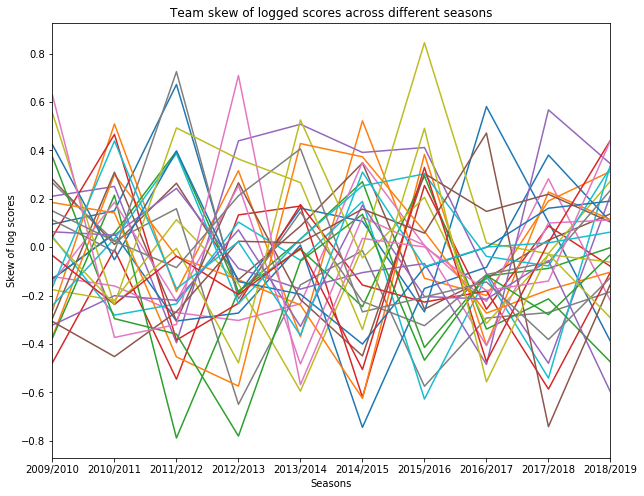

In [12]:
df_logged_skew.plot(legend=False, figsize=[10, 8])
plt.title('Team skew of logged scores across different seasons')
plt.ylabel('Skew of log scores')

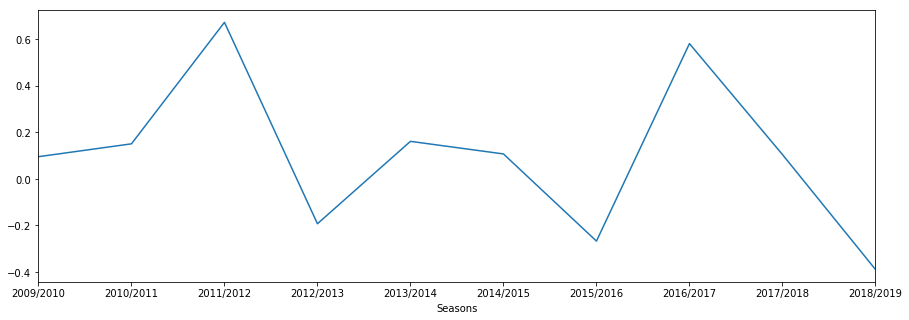

In [13]:
df_logged_skew['ATL skew'].plot(legend=False,figsize=[15, 5])

Seems like skew is now centered around zero. This suggests that the lognormal distribution could be quite fitting

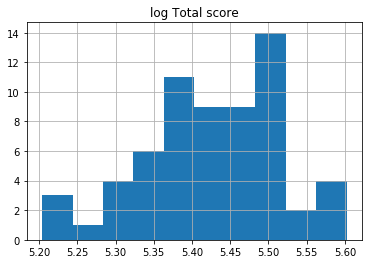

In [14]:
team = 'ATL'

df_team = filter_by_team(df_this_season, team)
df_team.hist('log Total score')
avg = df_team['log Total score'].mean()
sd = df_team['log Total score'].std()

Work on this shit later, too tired. Just fit a lognormal to the total scores of all games this season and trade of that

Text(0.5, 1.0, 'Average score 220.92\nMedian 220.0\nStd score 20.46\navg_dev 16.35')

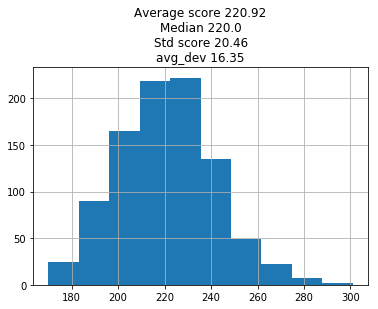

In [15]:
df_this_season.hist('Total score')
avg_this_season = df_this_season['Total score'].mean()
std_this_season = df_this_season['Total score'].std()
median = df_this_season['Total score'].median()
avg_dev = df_this_season['Total score'].apply(lambda x: abs(x - avg_this_season)).mean()
plt.title('Average score {:.2f}\nMedian {}\nStd score {:.2f}\navg_dev {:.2f}'.format(
    avg_this_season, median, std_this_season, avg_dev))

In [16]:
from scipy.stats import lognorm
s, loc, scale = lognorm.fit(df_this_season['Total score'])
print(s, loc, scale)

ModuleNotFoundError: No module named 'scipy'

In [ ]:
def emp_option_theo(option, strike, df):
    if option not in ['C','P']:
        raise ValueError('option must be "C" or "P"')
    n = float(len(df))
    if option == 'C':
        total_payoff = df['Total score'].apply(lambda score: 0 if score < strike else score - strike).sum()
    elif option == 'P':
        total_payoff = df['Total score'].apply(lambda score: 0 if score > strike else strike - score).sum()

    value = total_payoff/n
    
    #print('Empirical probability ITM is {}'.format((df['Total score'] > strike).sum()/n))
    return value

In [ ]:
emp_option_theo('C', 220, df_this_season)

In [ ]:
df_theos = pd.DataFrame(data={
    'strike':list(range(150, 360, 10))
})
df_theos['Call theo'] = df_theos.strike.apply(lambda K: emp_option_theo('C', K, df_this_season))
df_theos['Put theo'] = df_theos.strike.apply(lambda K: emp_option_theo('P', K, df_this_season))
df_theos